In [88]:
#installing kaggle
!pip install kaggle

In [89]:
#creating a folder named '.kaggle'
#!mkdir ~/.kaggle

In [90]:
#API token created and kaggle.json file downloaded and moved to '.kaggle' folder
#making sure if kaggle.json file is in '.kaggle' folder
#!cd /Users/ankita/.kaggle/ && ls

In [91]:
#search dataset from the preffered list
!kaggle datasets list -s 'aus real estate'

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
htagholdings/aus-real-estate-sales-march-2019-to-april-2020    AUS Real Estate Sales September 2018 to June 2020    5MB  2020-07-24 00:13:58            741         21  1.0              
gauravduttakiit/weather-in-aus                                 Weather in AUS                                       4MB  2021-02-27 19:34:45             39          8  0.7058824        
crescenzo/lunardistance                                        Lunar Daily Distance and Declination : 1800-2020     1MB  2017-05-03 02:11:34            174          4  0.64705884       
vaibhavpip/cricinfo-database-of-odis-in-2010s                  Cricinf

In [92]:
#will take care of privacy of your API key
!chmod 600 /Users/ankita/.kaggle/kaggle.json

In [93]:
#downloading dataset 
!kaggle datasets download -d 'htagholdings/aus-real-estate-sales-march-2019-to-april-2020'

aus-real-estate-sales-march-2019-to-april-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [94]:
#unzipping the file
!unzip aus-real-estate-sales-march-2019-to-april-2020.zip -d data/

Archive:  aus-real-estate-sales-march-2019-to-april-2020.zip
  inflating: data/aus-property-sales-sep2018-april2020.csv  


In [95]:
#renaming the csv file to rs.csv and moving to the data folder'data'
!mv data/aus-property-sales-sep2018-april2020.csv data/rs.csv

In [96]:
!cd data && ls

rs.csv


In [97]:
#Importing the dependencies and the libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import scipy.stats as sts
from scipy.stats import sem


In [98]:
csv_path="data/rs.csv"
data=pd.read_csv(csv_path)
data

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,2018-09-18 00:00:00,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3,unit,NSW1221,NSW180
1,2018-09-24 00:00:00,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3,unit,NSW1221,NSW180
2,2018-09-26 00:00:00,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26 00:00:00,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02 00:00:00,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320329,2019-09-09 00:00:00,NaN,Taylor,Canberra,ACT,-35.152128,149.099435,3,townhouse,ACT934,ACT
320330,2019-09-10 00:00:00,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,2019-09-10 00:00:00,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,2020-03-10 00:00:00,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


In [99]:
#Looking at the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320334 entries, 0 to 320333
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date_sold      320334 non-null  object 
 1   price          257826 non-null  float64
 2   suburb         320334 non-null  object 
 3   city_name      320334 non-null  object 
 4   state          320334 non-null  object 
 5   lat            320256 non-null  float64
 6   lon            320256 non-null  float64
 7   bedrooms       320334 non-null  int64  
 8   property_type  320334 non-null  object 
 9   loc_pid        320334 non-null  object 
 10  lga_pid        320334 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 26.9+ MB


In [100]:
#Dropping the rows for any null values (The price values are missing for certain properties)
data.dropna(how = 'any', inplace = True)
data



,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
2,2018-09-26 00:00:00,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26 00:00:00,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02 00:00:00,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
5,2018-10-12 00:00:00,960000.0,Darling Point,Sydney,NSW,-33.869516,151.237239,2,unit,NSW1221,NSW180
7,2018-10-25 00:00:00,1615000.0,Darling Point,Sydney,NSW,-33.876785,151.233727,2,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320328,2019-01-11 00:00:00,439900.0,Taylor,Canberra,ACT,-35.152423,149.103550,2,townhouse,ACT934,ACT
320330,2019-09-10 00:00:00,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,2019-09-10 00:00:00,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,2020-03-10 00:00:00,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


In [101]:
#Converting the date and time stamp in the date_sold column  to just date type
data['date_sold']=pd.to_datetime(data.date_sold)

data


,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
2,2018-09-26,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
5,2018-10-12,960000.0,Darling Point,Sydney,NSW,-33.869516,151.237239,2,unit,NSW1221,NSW180
7,2018-10-25,1615000.0,Darling Point,Sydney,NSW,-33.876785,151.233727,2,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320328,2019-01-11,439900.0,Taylor,Canberra,ACT,-35.152423,149.103550,2,townhouse,ACT934,ACT
320330,2019-09-10,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,2019-09-10,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,2020-03-10,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


In [102]:
vic_suburb = data.groupby(["city_name"]).get_group("Melbourne")

mel_data = vic_suburb.groupby("suburb")["date_sold"].count()



vic_data = mel_data.reset_index()
vic_data = vic_data.rename(columns = {"date_sold" : "Property Count"}) 
new_vic_data = vic_data.sort_values(["Property Count"] , ascending = False)

final_data = new_vic_data.loc[new_vic_data["Property Count"] > 25]




<AxesSubplot:>

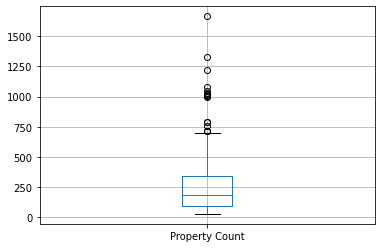

In [103]:
final_data.boxplot(column = "Property Count")


In [104]:
vic_data1 = new_vic_data.head(10)
final_data.describe()

,Property Count
count,384.000000
mean,254.432292
std,229.409767
min,26.000000
25%,89.750000
50%,185.000000
75%,338.000000
max,1667.000000


Text(0.5, 1.0, 'Top 10 suburbs of victoria')

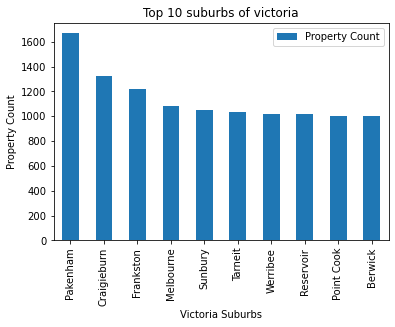

In [105]:
vic_data1 = final_data.head(10)
vic_data1.set_index("suburb").plot(kind='bar')

plt.xlabel("Victoria Suburbs")
plt.ylabel("Property Count")

plt.title("Top 10 suburbs of victoria")
#plt.savefig("D:/Materials/Git Project/real-estate-project/Top 10 suburbs of victoria")

,suburb,Property Count
230,Kallista,32
167,Essendon West,31
350,Plumpton,31
405,St Andrews Beach,30
238,Keilor Park,30
465,Werribee South,28
459,Waterways,28
358,Red Hill,28
349,Plenty,26
51,Blind Bight,26


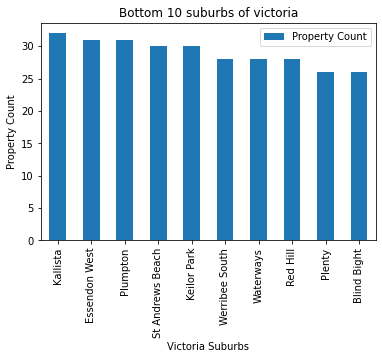

In [106]:
vic_data2 = final_data.tail(10)
vic_data2.set_index("suburb").plot(kind='bar')

plt.xlabel("Victoria Suburbs")
plt.ylabel("Property Count")

plt.title("Bottom 10 suburbs of victoria")
#plt.savefig("D:/Materials/Git Project/real-estate-project/Bottom 10 suburbs of victoria")


vic_data2

In [107]:
#vic_suburb = data.groupby(["city_name"]).get_group("Melbourne")
#vic_suburb.set_index

# Snehitha's Part 



Text(0.5, 1.0, 'NSW various property type distribution')

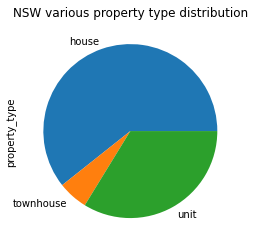

In [108]:
nsw_df  = data.loc[data["state"] == "NSW", :]
nsw_df.head()
nsw_property_type_df = nsw_df.groupby("property_type")["property_type"].count()

# nsw_suburb_df= nsw_df.groupby("suburb")["property_type"].count() #This has to be done as Minh Suggested, taking top 10 and
#bottom 10 of all states and demonstrating a final visual showing means of all for whole country
nsw_property_type_df.plot(kind= "pie")
#nsw_property_type_df.plot(kind= "bar")
plt.title("NSW various property type distribution")

Text(0.5, 1.0, 'NSW property type distribution based on number of bedrooms')

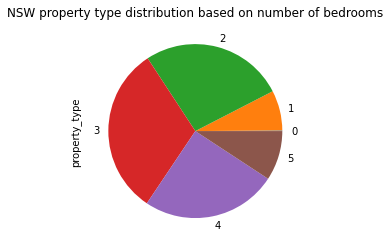

In [109]:
nsw_bedrooms_df = nsw_df.groupby("bedrooms")["property_type"].count()
nsw_bedrooms_df.plot(kind= "pie")
plt.title("NSW property type distribution based on number of bedrooms")

Text(0.5, 1.0, 'VIC various property type distribution')

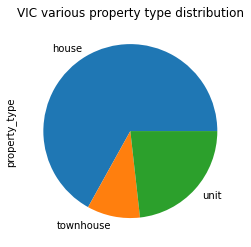

In [110]:
vic_df  = data.loc[data["state"] == "VIC", :]
vic_df.head()
vic_property_type_df = vic_df.groupby("property_type")["property_type"].count()

# nsw_suburb_df= nsw_df.groupby("suburb")["property_type"].count() #This has to be done as Minh Suggested, taking top 10 and
#bottom 10 of all states and demonstrating a final visual showing means of all for whole country

vic_property_type_df.plot(kind= "pie")
#nsw_property_type_df.plot(kind= "bar")

plt.title("VIC various property type distribution")

Text(0.5, 1.0, 'VIC property type distribution based on number of bedrooms')

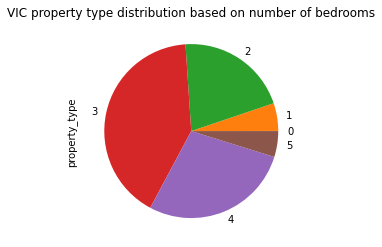

In [111]:
vic_bedrooms_df = vic_df.groupby("bedrooms")["property_type"].count()
vic_bedrooms_df.plot(kind= "pie")
plt.title("VIC property type distribution based on number of bedrooms")

Text(0.5, 1.0, 'SA various property type distribution')

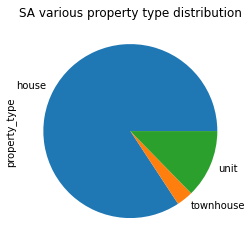

In [112]:
sa_df  = data.loc[data["state"] == "SA", :]
sa_df
sa_property_type_df = sa_df.groupby("property_type")["property_type"].count()
sa_property_type_df.plot(kind= "pie")
plt.title("SA various property type distribution")

Text(0.5, 1.0, 'SA property type distribution based on number of bedrooms')

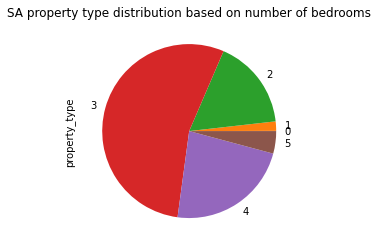

In [113]:
sa_bedrooms_df = sa_df.groupby("bedrooms")["property_type"].count()
sa_bedrooms_df.plot(kind= "pie")
plt.title("SA property type distribution based on number of bedrooms")

Text(0.5, 1.0, 'WA various property type distribution')

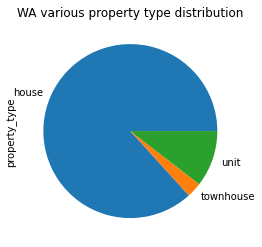

In [114]:
wa_df  = data.loc[data["state"] == "WA", :]
wa_df
wa_property_type_df = wa_df.groupby("property_type")["property_type"].count()
wa_property_type_df.plot(kind= "pie")
plt.title("WA various property type distribution")

Text(0.5, 1.0, 'wA property type distribution based on number of bedrooms')

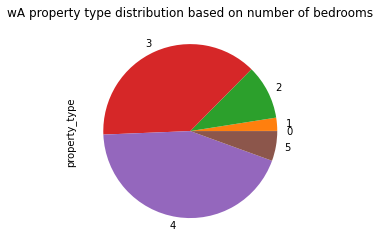

In [115]:
wa_bedrooms_df = wa_df.groupby("bedrooms")["property_type"].count()
wa_bedrooms_df.plot(kind= "pie")
plt.title("wA property type distribution based on number of bedrooms")

Text(0.5, 1.0, 'ACT various property type distribution')

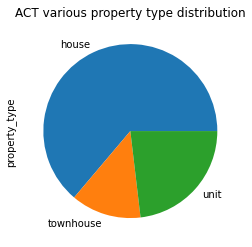

In [116]:
act_df  = data.loc[data["state"] == "ACT", :]
act_df
act_property_type_df = act_df.groupby("property_type")["property_type"].count()
act_property_type_df.plot(kind= "pie")
plt.title("ACT various property type distribution")

Text(0.5, 1.0, ' ACT property type distribution based on number of bedrooms')

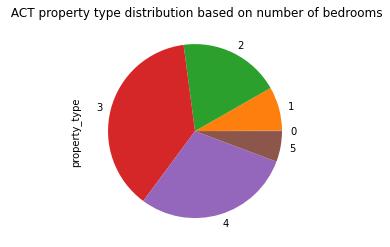

In [117]:
act_bedrooms_df = act_df.groupby("bedrooms")["property_type"].count()
act_bedrooms_df.plot(kind= "pie")
plt.title(" ACT property type distribution based on number of bedrooms")

In [118]:
data["state"].value_counts()

VIC    98535
NSW    68223
SA     27612
QLD    27341
WA     26659
ACT     9403
Name: state, dtype: int64

Text(0.5, 1.0, ' QLD various property type distribution')

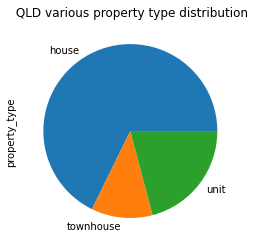

In [119]:
qld_df  = data.loc[data["state"] == "QLD", :]
qld_df
qld_property_type_df = qld_df.groupby("property_type")["property_type"].count()
qld_property_type_df.plot(kind= "pie")
plt.title(" QLD various property type distribution")

Text(0.5, 1.0, ' QLD property type distribution based on number of bedrooms')

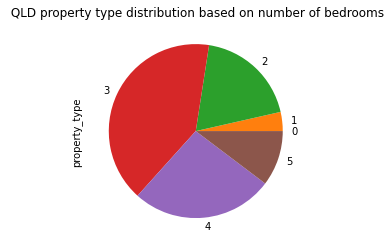

In [120]:
qld_bedrooms_df = qld_df.groupby("bedrooms")["property_type"].count()


qld_bedrooms_df 
qld_bedrooms_df.plot(kind= "pie")
plt.title(" QLD property type distribution based on number of bedrooms")

# Analysing the City/State with most number of sales and the most popular property type for the whole data set (Sep 2018 - Jul 2020)  (Snehitha's Part)

In [121]:
#Creating dataframes and series to hold the total number of properties with respective number of bedrooms for whole dataset
#Which will be used for plotting the charts

count_city = pd.DataFrame(data["city_name"].value_counts())
count_city.sort_values(by=['city_name'] , ascending=False)
labels_city= count_city['city_name'].index 
values_city =count_city['city_name'] 

#Creating dataframes and series to hold the total number of properties with respective to type of property for whole dataset
#Which will be used for plotting the charts
count_property = pd.DataFrame(data.property_type.value_counts())
count_property.sort_values(by=['property_type'] , ascending=False)
labels_property= count_property['property_type'].index 
values_property =count_property['property_type'] 



In [122]:
#Using the make_subplots module of Ploty, plotting  interactive Pie Charts of a grid size 1x2 
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=("Total number of sales in each city", "Total number of propertiessold based on property types"))
#Assigning the respective trace(pie) with the values and labels from the series and index list created above for whole year                                  
fig.add_trace(go.Pie(labels=labels_city, values=values_city, name="City name "),
              1, 1)
fig.add_trace(go.Pie(labels=labels_property , values= values_property  , name="Property_type"),
              1, 2)

#Assigning the respective trace(pie) with the values and labels from the series and index list created above for each quarterr
# Creating donut like pies by making a hole and adding other visual features 
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig.update_traces(hole=.3, hoverinfo="label+value+name" ,  marker=dict(colors=colors, line=dict(color='#000000', width=2) ),
                 textposition='inside')

fig.update_layout(title_text="City with total number of sales and Property types distribution for the whole data set ",
                   annotations=[dict(text='City ', x=0.22, y=0.5, font_size=20, showarrow=False),
                   dict(text='Types of property', x=0.79, y=0.4, font_size=12, showarrow=True)])
    
        
                 
fig.show()


# Extracting the data for year 2019 and performing analysis on sales of properties with different number of bedrooms (Snehitha's Part)

In [123]:
#Extracting a dataframe from the whole dataframe for only 2019 data which will be used for all the below three analysis
data_2019 = data.loc[(data["date_sold"] >= "2019-01-01") & (data["date_sold"] <= "2019-12-31")]


#Creating a dateframe for Quarter 1( 01-01-2019 to 31-03-2019) 

bedroom_data_q1 = data_2019.loc[(data_2019['date_sold'] >="2019-01-01") & (data_2019['date_sold'] <= "2019-03-31")]



#Creating dataframes and series to hold the total number of properties with respective number of bedrooms for Quarter-1
#Which will be used for plotting the charts
bedrooms_count1 = pd.DataFrame(bedroom_data_q1["bedrooms"].value_counts())
bedrooms_count1.sort_values(by=['bedrooms'] , ascending=False)
bedrooms_labels1= bedrooms_count1['bedrooms'].index 
bedroom_values1 =bedrooms_count1['bedrooms'] 

#Viewing the dataframe of Quarter-1 of 2019
bedroom_data_q1



,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
22,2019-02-05,1200000.0,Darling Point,Sydney,NSW,-33.875168,151.234649,2,unit,NSW1221,NSW180
23,2019-02-26,2350000.0,Darling Point,Sydney,NSW,-33.875929,151.234713,3,unit,NSW1221,NSW180
24,2019-02-27,5025000.0,Darling Point,Sydney,NSW,-33.870709,151.238680,3,unit,NSW1221,NSW180
30,2019-03-05,1855000.0,Darling Point,Sydney,NSW,-33.873735,151.239819,3,unit,NSW1221,NSW180
33,2019-03-12,1310000.0,Darling Point,Sydney,NSW,-33.869397,151.239422,2,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320245,2019-01-08,476000.0,Coombs,Canberra,ACT,-35.318294,149.042545,3,townhouse,ACT906,ACT
320247,2019-02-21,496000.0,Coombs,Canberra,ACT,-35.320000,149.039373,3,townhouse,ACT906,ACT
320290,2019-01-30,550000.0,Moncrieff,Canberra,ACT,-35.160135,149.122513,3,townhouse,ACT932,ACT
320291,2019-03-30,450000.0,Moncrieff,Canberra,ACT,-35.159394,149.119042,3,townhouse,ACT932,ACT


In [124]:

#Creating a dateframe for Quarter 2( 01-04-2019 to 30-06-2019) 


bedroom_data_q2 = data_2019.loc[(data_2019['date_sold'] >="2019-04-01") & (data_2019['date_sold'] <= "2019-06-30")]

bedroom_data_q2 

#Creating series and variables to hold the total number of properties with respective number of bedrooms for Quarter-2
#Which will be used for plotting the charts
bedrooms_count2 = pd.DataFrame(bedroom_data_q2["bedrooms"].value_counts())
bedrooms_count2.sort_values(by=['bedrooms'] , ascending=False)
bedrooms_labels2= bedrooms_count2['bedrooms'].index 
bedroom_values2 =bedrooms_count2['bedrooms'] 

#Viewing  Quarter-2 dataframe of 2019
bedroom_data_q2 

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
38,2019-04-23,1725000.0,Darling Point,Sydney,NSW,-33.868355,151.238095,2,unit,NSW1221,NSW180
41,2019-05-29,1505000.0,Darling Point,Sydney,NSW,-33.874438,151.238553,2,unit,NSW1221,NSW180
157,2019-04-02,1450000.0,Double Bay,Sydney,NSW,-33.874902,151.243992,3,unit,NSW1294,NSW180
163,2019-05-25,941111.0,Double Bay,Sydney,NSW,-33.878911,151.239941,2,unit,NSW1294,NSW180
164,2019-05-27,1400000.0,Double Bay,Sydney,NSW,-33.876838,151.239221,2,unit,NSW1294,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320277,2019-04-11,590000.0,Wright,Canberra,ACT,-35.324988,149.042590,3,townhouse,ACT907,ACT
320292,2019-04-12,376000.0,Moncrieff,Canberra,ACT,-35.154272,149.114021,2,townhouse,ACT932,ACT
320293,2019-04-29,450000.0,Moncrieff,Canberra,ACT,-35.156202,149.111791,3,townhouse,ACT932,ACT
320294,2019-05-13,520000.0,Moncrieff,Canberra,ACT,-35.163073,149.116511,3,townhouse,ACT932,ACT


In [125]:

#Extracting  a dateframe for Quarter 3( 01-07-2019 to 30-09-2019) 


bedroom_data_q3 = data_2019.loc[(data_2019['date_sold'] >= "2019-07-01") & (data_2019['date_sold'] <= "2019-09-30")]

bedroom_data_q3
#Creating series and variables to hold the total number of properties with respective number of bedrooms for Quarter-3
#Which will be used for plotting the charts

bedrooms_count3 = pd.DataFrame(bedroom_data_q3["bedrooms"].value_counts())
bedrooms_count3.sort_values(by=['bedrooms'] , ascending=False)
bedrooms_labels3= bedrooms_count3['bedrooms'].index 
bedroom_values3 =bedrooms_count3['bedrooms']


#Viewing Quarter -3 dataframe of 2019
bedroom_data_q3

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
49,2019-08-20,3300000.0,Darling Point,Sydney,NSW,-33.868897,151.236465,2,unit,NSW1221,NSW180
53,2019-09-13,847000.0,Darling Point,Sydney,NSW,-33.868896,151.236464,1,unit,NSW1221,NSW180
54,2019-09-17,1375000.0,Darling Point,Sydney,NSW,-33.871913,151.236395,2,unit,NSW1221,NSW180
55,2019-09-18,4460000.0,Darling Point,Sydney,NSW,-33.872404,151.240064,3,unit,NSW1221,NSW180
57,2019-09-20,2615000.0,Darling Point,Sydney,NSW,-33.876771,151.233716,2,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320286,2019-09-02,385000.0,Jacka,Canberra,ACT,-35.159919,149.127317,2,townhouse,ACT928,ACT
320296,2019-08-01,470000.0,Moncrieff,Canberra,ACT,-35.155622,149.113035,3,townhouse,ACT932,ACT
320297,2019-08-12,462000.0,Moncrieff,Canberra,ACT,-35.154272,149.114021,3,townhouse,ACT932,ACT
320330,2019-09-10,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT


In [126]:

#Creating a dateframe for Quarter 4( 01-10-2019 to 31-12-2019) 


bedroom_data_q4 = data_2019.loc[(data_2019['date_sold'] >= " 2019-10-01") & (data_2019['date_sold'] <= "2019-12-31")]


#Creating series and variables to hold the total number of properties with respective number of bedrooms for Quarter-4
#Which will be used for plotting the charts


bedrooms_count4 = pd.DataFrame(bedroom_data_q4["bedrooms"].value_counts())
bedrooms_count4.sort_values(by=['bedrooms'] , ascending=False)
bedrooms_labels4= bedrooms_count4['bedrooms'].index 
bedroom_values4 =bedrooms_count4['bedrooms'] 

#Viewing Quarter-4 dataframe of 2019

bedroom_data_q4


,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
60,2019-10-04,1200000.0,Darling Point,Sydney,NSW,-33.875912,151.236878,1,unit,NSW1221,NSW180
61,2019-10-08,1595000.0,Darling Point,Sydney,NSW,-33.868896,151.236464,2,unit,NSW1221,NSW180
63,2019-10-16,1141500.0,Darling Point,Sydney,NSW,-33.872466,151.237142,2,unit,NSW1221,NSW180
65,2019-10-30,1380000.0,Darling Point,Sydney,NSW,-33.871356,151.238211,2,unit,NSW1221,NSW180
66,2019-10-31,1855000.0,Darling Point,Sydney,NSW,-33.873906,151.235465,3,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320300,2019-11-08,410000.0,Moncrieff,Canberra,ACT,-35.156963,149.109403,2,townhouse,ACT932,ACT
320301,2019-11-11,455100.0,Moncrieff,Canberra,ACT,-35.153878,149.118797,3,townhouse,ACT932,ACT
320302,2019-11-19,484000.0,Moncrieff,Canberra,ACT,-35.154065,149.113763,3,townhouse,ACT932,ACT
320303,2019-11-27,405000.0,Moncrieff,Canberra,ACT,-35.153879,149.114604,2,townhouse,ACT932,ACT


In [127]:
#Using the make_subplots module of Ploty, plotting  interactive Pie Charts of a grid size 2x2 
fig = make_subplots(rows=2,cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=("Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4" ))


#Assigning the respective trace(pie) with the values and labels from the series and index list created above for each quarter


fig.add_trace(go.Pie(labels= bedrooms_labels1, values=bedroom_values1, name="Bedrooms"),
              1, 1)
fig.add_trace(go.Pie(labels=bedrooms_labels2, values=bedroom_values2, name="Bedrooms"),
              1, 2)
                    
fig.add_trace(go.Pie(labels= bedrooms_labels3, values=bedroom_values3, name="Bedrooms"),
              2, 1)
                    
fig.add_trace(go.Pie(labels= bedrooms_labels4, values=bedroom_values4, name="Bedrooms"),
              2, 2)

#Updating the layout by adding a title

fig.update_layout(title_text="Properties sold for each quarter based on the number of bedrooms for the Year 2019 ")
    
                 



# Extracting the data frames for each quarter of the year 2019 to do analysis on number of properties sold for each quarter(Snehitha's Part)

In [128]:
# Extracting the data frames for each quarter of the year 2019 to do analysis on number of properties sold for each quarter

property_data_q1 = data_2019.loc[(data_2019['date_sold'] >="2019-01-01") & (data_2019['date_sold'] <= "2019-03-31")]

property_data_q2 = data_2019.loc[(data_2019['date_sold'] >="2019-04-01") & (data_2019['date_sold'] <= "2019-06-30")]

property_data_q3 = data_2019.loc[(data_2019['date_sold'] >="2019-07-01") & (data_2019['date_sold'] <= "2019-09-30")]
 
property_data_q4 = data_2019.loc[(data_2019['date_sold'] >= " 2019-10-01") & (data_2019['date_sold'] <= "2019-12-31")]



#Plotting a interactive bar using make_subplots module of plotly

fig = make_subplots(rows=1, cols=1)

a= len(property_data_q1["date_sold"])
b= len(property_data_q2["date_sold"])
c= len(property_data_q3["date_sold"])
d= len(property_data_q4["date_sold"])

#Assigning the axis titles and 

fig.add_trace(go.Bar(x=["Quarter 1", "Quarter 2", "Quarter 3"," Quarter 4"], y=[a,b,c,d]), 
                     1, 1)
                   
fig.update_layout(title_text="Total number of properties sold for every quarter of 2019 ")#,coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()





In [129]:
#Using the make_subplots module of Ploty, plotting  interactive Pie Charts of a grid size 1x1
fig = make_subplots(rows=1, cols=1 , specs=[[{'type':'domain'}]])

#Assigning the respective trace(pie) with the values and labels from the series and index list created above for each quarter

fig.add_trace(go.Pie(labels=["Quarter 1", "Quarter 2", "Quarter 3"," Quarter 4"], values=[a,b,c,d], name="Sales"),
              1, 1)
#For donut like pies and all visi
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig.update_traces(hole=.3, hoverinfo="label+value+name" ,  marker=dict(colors=colors, line=dict(color='#000000', width=2) ),
                 textposition='inside')

fig.update_layout(title_text="Variation(%) in the number of sales per quarter ")
    
    
                 
fig.show()


# Extracting the data frames for each quarter of the year 2019 to do analysis on type of properties sold for each quarter(Snehitha's Part)

In [130]:
# Extracting the data frames for each quarter of the year 2019 to do analysis on type of properties sold for each quarter

#Extracting the  dateframe for Quarter 1( 01-01-2019 to 31-03-2019) and the required dataframes and series which will be used for plotting
property_type_q1 = data_2019.loc[(data_2019['date_sold'] >="2019-01-01") & (data_2019['date_sold'] <= "2019-03-31")]
property_type_count1 = pd.DataFrame(property_type_q1["property_type"].value_counts())
property_type_count1.sort_values(by=['property_type'] , ascending=False)
property_type_labels1= property_type_count1['property_type'].index 
property_type_values1 =property_type_count1['property_type'] 


#Extracting the  dateframe for Quarter 2( 2019-04-01 to 2019-06-30) and the required dataframes and series which will be used for plotting
property_type_q2 = data_2019.loc[(data_2019['date_sold'] >="2019-04-01") & (data_2019['date_sold'] <= "2019-06-30")]
property_type_count2 = pd.DataFrame(property_type_q2["property_type"].value_counts())
property_type_count2.sort_values(by=['property_type'] , ascending=False)
property_type_labels2= property_type_count2['property_type'].index 
property_type_values2 =property_type_count2['property_type'] 

#Extracting the  dateframe for Quarter 3( 2019-07-01 to 2019-09-30) and the required dataframes and series which will be used for plotting
property_type_q3 = data_2019.loc[(data_2019['date_sold'] >="2019-07-01") & (data_2019['date_sold'] <= "2019-09-30")]
property_type_count3 = pd.DataFrame(property_type_q3["property_type"].value_counts())
property_type_count3.sort_values(by=['property_type'] , ascending=False)
property_type_labels3= property_type_count3['property_type'].index 
property_type_values3 =property_type_count3['property_type'] 

#Extracting the  dateframe for Quarter 3( 2019-10-01 to 2019-12-31) and the required dataframes and series which will be used for plotting
property_type_q4 = data_2019.loc[(data_2019['date_sold'] >= " 2019-10-01") & (data_2019['date_sold'] <= "2019-12-31")]
property_type_count4 = pd.DataFrame(property_type_q4["property_type"].value_counts())
property_type_count4.sort_values(by=['property_type'] , ascending=False)
property_type_labels4= property_type_count4['property_type'].index 
property_type_values4 =property_type_count4['property_type'] 

In [131]:
#Plotting a interactive bar using make_subplots module of plotly of grid 2x2

fig = make_subplots(rows=2, cols=2 , 
                   subplot_titles=("Quarter 1", "Quarter 2", "Quarter 3", "Quarter4"))

#Assigning the respective trace(Bar) with the values and labels from the series and index list created above for each quarter

fig.add_trace(go.Bar(x=property_type_labels1, y=property_type_values1),                 
              1, 1)
fig.add_trace(go.Bar(x=property_type_labels2, y=property_type_values2),                 
              1, 2)
fig.add_trace(go.Bar(x=property_type_labels3, y=property_type_values3),                 
              2, 1)
fig.add_trace(go.Bar(x=property_type_labels4, y=property_type_values4),                 
              2, 2)
#Updating the layout with title
fig.update_layout(title_text="Sales depending on Property type for each quarter of 2019 ")

# Analysing prices for 3-Bedroom and 4-Bedroom properties in the city with most number of sales and suburb with most number of properties sold (Snehitha's Part)

In [132]:
#Extracting the dataframe with all the properties with 3- bedrooms for only Victoria state
bedrooms_count3 = data.loc[(data["bedrooms"]==3) & (data["state"]== "VIC") & (data["suburb"] == "Pakenham")]


#Viewing the dataframe with 3-Bedroom property sales of Pakenham,Melbourne
bedrooms_count3    





,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
51691,2018-09-18,390000.0,Pakenham,Melbourne,VIC,-38.071377,145.467437,3,unit,VIC2023,VIC161
51693,2018-09-26,455200.0,Pakenham,Melbourne,VIC,-38.062642,145.488504,3,unit,VIC2023,VIC161
51698,2018-10-17,510000.0,Pakenham,Melbourne,VIC,-38.056892,145.441886,3,unit,VIC2023,VIC161
51699,2018-10-19,400000.0,Pakenham,Melbourne,VIC,-38.056231,145.493485,3,unit,VIC2023,VIC161
51700,2018-11-01,360000.0,Pakenham,Melbourne,VIC,-38.056805,145.473083,3,unit,VIC2023,VIC161
...,...,...,...,...,...,...,...,...,...,...,...
310928,2020-03-03,415000.0,Pakenham,Melbourne,VIC,-38.064011,145.446151,3,townhouse,VIC2023,VIC161
310932,2020-04-14,423000.0,Pakenham,Melbourne,VIC,-38.067800,145.471292,3,townhouse,VIC2023,VIC161
310933,2020-04-14,475000.0,Pakenham,Melbourne,VIC,-38.067029,145.454217,3,townhouse,VIC2023,VIC161
310934,2020-04-23,410000.0,Pakenham,Melbourne,VIC,-38.065659,145.454242,3,townhouse,VIC2023,VIC161


In [133]:
#Extracting the dataframe with all the properties with 4- bedrooms for only Victoria state
bedrooms_count4 = data.loc[(data["bedrooms"]==4) & (data["state"]== "VIC") & (data["suburb"] == "Pakenham") ]

#Viewing the dataframe with 4-Bedroom property sales of Pakenham,Melbourne
bedrooms_count4

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
191172,2018-09-02,620000.0,Pakenham,Melbourne,VIC,-38.058174,145.454603,4,house,VIC2023,VIC161
191179,2018-09-04,630000.0,Pakenham,Melbourne,VIC,-38.087018,145.461284,4,house,VIC2023,VIC161
191180,2018-09-05,605000.0,Pakenham,Melbourne,VIC,-38.077214,145.444266,4,house,VIC2023,VIC161
191181,2018-09-05,540000.0,Pakenham,Melbourne,VIC,-38.079428,145.467845,4,house,VIC2023,VIC161
191182,2018-09-05,525000.0,Pakenham,Melbourne,VIC,-38.056417,145.487354,4,house,VIC2023,VIC161
...,...,...,...,...,...,...,...,...,...,...,...
310897,2019-04-15,412000.0,Pakenham,Melbourne,VIC,-38.073149,145.467738,4,townhouse,VIC2023,VIC161
310899,2019-06-19,448000.0,Pakenham,Melbourne,VIC,-38.068992,145.451410,4,townhouse,VIC2023,VIC161
310902,2019-07-19,415600.0,Pakenham,Melbourne,VIC,-38.056789,145.512459,4,townhouse,VIC2023,VIC161
310905,2019-08-21,436000.0,Pakenham,Melbourne,VIC,-38.077598,145.451039,4,townhouse,VIC2023,VIC161


In [134]:
#Creating a interactive Bar chart using ploty module of grid size 1x1
fig = make_subplots(rows=1, cols=1)

#Calculating the average price values of 3- Bedroom and 4-Bedroom property
a=bedrooms_count3["price"].mean()
b= bedrooms_count4["price"].mean()

#Assigning the respective trace(Bar) with the values and labels created above for each quarter
fig.add_trace(go.Bar(x=["Bedroom 3 Properties", "Bedroom  4 Properties"], y=[a,b]),
              1, 1)

                     
#Updating the layout by adding the Title                   
fig.update_layout(title_text=" Average Price distribution for 3-Bedroom and 4-Bedroom properties in Pakenham, Melbourne ")#,coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

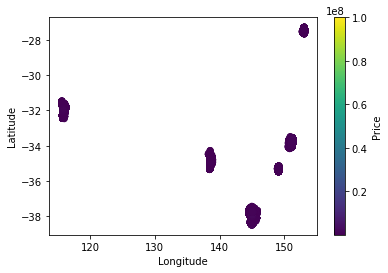

In [135]:
plt.scatter(data['lon'],data['lat'],c=data['price'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Price")
plt.show()

In [136]:
br_price = data[['bedrooms', 'price']]
threebr_price = br_price.loc[br_price['bedrooms'] == 3, :]
threebr_price

,bedrooms,price
3,3,1928000.0
4,3,1475000.0
8,3,3200000.0
9,3,2305000.0
10,3,2350000.0
...,...,...
320323,3,507000.0
320324,3,497000.0
320330,3,549900.0
320331,3,499900.0


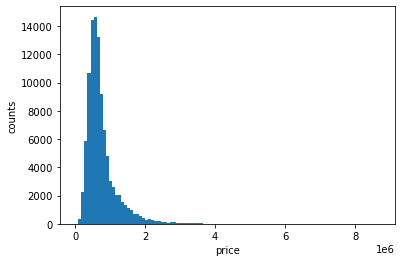

Mean: 753507.4226827422
Median: 624000.0
Mode: 0    600000.0
dtype: float64
NormaltestResult(statistic=7636.981625607441, pvalue=0.0)


In [137]:
# Determine which measure of centraltendency is the most appropriate and get a picture of the price data in a histogram
plt.hist(threebr_price['price'], bins=100)
plt.xlabel('price')
plt.ylabel('counts')
plt.show()
print('Mean: ' + str(threebr_price['price'].mean()))
print('Median: ' + str(threebr_price['price'].median()))
print('Mode: ' + str(threebr_price['price'].mode()))
print(sts.normaltest(threebr_price['price'].sample(10000)))

The histogram above does not look like its normally distributed, with P-value < 0.05.
The p-value =0.0 also means that it is a non-normal data.

The curve is positively skewed which means that the median is less than the mean. 
There are more lower-priced house making the median smaller than the mean, which is being pulled higher by a few higher-priced properties

QUARTILE CALCULATIONS (France G.)
Determine if there are any potential outliers in the residential properties prices data

In [138]:
onebr_price = br_price.loc[br_price['bedrooms'] == 1, :]
twobr_price = br_price.loc[br_price['bedrooms'] == 2, :]
fourbr_price = br_price.loc[br_price['bedrooms'] == 4, :]
fivebr_price = br_price.loc[br_price['bedrooms'] == 5, :]

1-BR quartile calculations

In [139]:
# 1-BR quartile calculations
quartiles1 = onebr_price['price'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1

print(f'Lower quartile: {lowerq1}')
print(f'Upper quartile: {upperq1}')
print(f'Inter-Quartile Range: {iqr1}')
print(f'Median: {quartiles1[0.5]}')

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

outlier_1price = onebr_price[(onebr_price['price'] < lower_bound1) | (onebr_price['price'] > upper_bound1)]
print('n:' + str(len(outlier_1price)))

Lower quartile: 320000.0
Upper quartile: 600000.0
Inter-Quartile Range: 280000.0
Median: 415000.0
Values below -100000.0 could be outliers.
Values above 1020000.0 could be outliers.
n:315


Lower quartile: 320000.0
Upper quartile: 600000.0
Inter-Quartile Range: 280000.0
Median: 415000.0
Values below -100000.0 could be outliers.
Values above 1020000.0 could be outliers.
n:315
2-BR quartile calculations

In [140]:
# 2-BR quartile calculations
quartiles2 = twobr_price['price'].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

print(f'Lower quartile: {lowerq2}')
print(f'Upper quartile: {upperq2}')
print(f'Inter-Quartile Range: {iqr2}')
print(f'Median: {quartiles2[0.5]}')

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

outlier_2price = twobr_price[(twobr_price['price'] < lower_bound2) | (twobr_price['price'] > upper_bound2)]
print('n:' + str(len(outlier_2price)))

Lower quartile: 420000.0
Upper quartile: 765000.0
Inter-Quartile Range: 345000.0
Median: 570000.0
Values below -97500.0 could be outliers.
Values above 1282500.0 could be outliers.
n:2756


In [141]:
# 3-BR quartile calculations
quartiles = threebr_price['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'Lower quartile: {lowerq}')
print(f'Upper quartile: {upperq}')
print(f'Inter-Quartile Range: {iqr}')
print(f'Median: {quartiles[0.5]}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_price = threebr_price[(threebr_price['price'] < lower_bound) | (threebr_price['price'] > upper_bound)]


Lower quartile: 476000.0
Upper quartile: 859558.0
Inter-Quartile Range: 383558.0
Median: 624000.0
Values below -99337.0 could be outliers.
Values above 1434895.0 could be outliers.


In [142]:
# 4-BR quartile calculations
quartiles4 = fourbr_price['price'].quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

print(f'Lower quartile: {lowerq4}')
print(f'Upper quartile: {upperq4}')
print(f'Inter-Quartile Range: {iqr4}')
print(f'Median: {quartiles4[0.5]}')

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be outliers.")
print(f"Values above {upper_bound4} could be outliers.")

outlier_4price = fourbr_price[(fourbr_price['price'] < lower_bound4) | (fourbr_price['price'] > upper_bound4)]
print('n:' + str(len(outlier_4price)))

Lower quartile: 582300.0
Upper quartile: 1070000.0
Inter-Quartile Range: 487700.0
Median: 747000.0
Values below -149250.0 could be outliers.
Values above 1801550.0 could be outliers.
n:5367


In [143]:
# 5-BR quartile calculations
quartiles5 = fivebr_price['price'].quantile([.25,.5,.75])
lowerq5 = quartiles5[0.25]
upperq5 = quartiles5[0.75]
iqr5 = upperq5-lowerq5

print(f'Lower quartile: {lowerq5}')
print(f'Upper quartile: {upperq5}')
print(f'Inter-Quartile Range: {iqr5}')
print(f'Median: {quartiles5[0.5]}')

lower_bound5 = lowerq5 - (1.5*iqr5)
upper_bound5 = upperq5 + (1.5*iqr5)
print(f"Values below {lower_bound5} could be outliers.")
print(f"Values above {upper_bound5} could be outliers.")

outlier_5price = fivebr_price[(fivebr_price['price'] < lower_bound5) | (fivebr_price['price'] > upper_bound5)]
print('n:' + str(len(outlier_5price)))

Lower quartile: 775000.0
Upper quartile: 1650000.0
Inter-Quartile Range: 875000.0
Median: 1073250.0
Values below -537500.0 could be outliers.
Values above 2962500.0 could be outliers.
n:1099


In [144]:
summary_qc = pd.DataFrame({
    'Bedroom': ['1-BR', '2-BR', '3-BR', '4-BR', '5-BR'],
    'Lower quartile': [lowerq1, lowerq2, lowerq, lowerq4, lowerq5],
    'Upper quartile': [upperq1, upperq2, upperq, upperq4, upperq5],
    'IQR': [iqr1, iqr2, iqr, iqr4, iqr5],
    'Median (AUD)': [quartiles1[0.5], quartiles2[0.5], quartiles[0.5], quartiles4[0.5], quartiles5[0.5]],
    'Lower bound': [lower_bound1, lower_bound2, lower_bound, lower_bound4, lower_bound5],
    'Upper bound': [upper_bound1, upper_bound2, upper_bound, upper_bound4, upper_bound5],
    'N': [len(outlier_1price), len(outlier_2price), len(outlier_price), len(outlier_4price), len(outlier_5price)],
})

summary_qc['Lower quartile'] = summary_qc['Lower quartile'].astype(int).map("${:,}".format)
summary_qc['Upper quartile'] = summary_qc['Upper quartile'].astype(int).map("${:,}".format)
summary_qc['IQR'] = summary_qc['IQR'].astype(int).map("${:,}".format)
summary_qc['Median (AUD)'] = summary_qc['Median (AUD)'].astype(int).map("${:,}".format)
summary_qc['Lower bound'] = summary_qc['Lower bound'].astype(int).map("${:,}".format)
summary_qc['Upper bound'] = summary_qc['Upper bound'].astype(int).map("${:,}".format)

summary_qc.set_index('Bedroom')

,Lower quartile,Upper quartile,IQR,Median (AUD),Lower bound,Upper bound,N
Bedroom,,,,,,,
1-BR,"$320,000","$600,000","$280,000","$415,000","$-100,000","$1,020,000",315
2-BR,"$420,000","$765,000","$345,000","$570,000","$-97,500","$1,282,500",2756
3-BR,"$476,000","$859,558","$383,558","$624,000","$-99,337","$1,434,895",7682
4-BR,"$582,300","$1,070,000","$487,700","$747,000","$-149,250","$1,801,550",5367
5-BR,"$775,000","$1,650,000","$875,000","$1,073,250","$-537,500","$2,962,500",1099


BOX PLOT 3-BR properties (France G.)

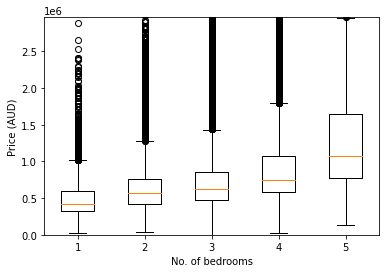

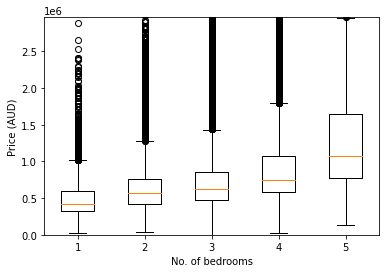

In [145]:

# Visualise the spread of the data through box-plot; no. of bedrooms v price 

# Create a dictionary for boxplot
one_price = onebr_price['price'].tolist()
two_price = twobr_price['price'].tolist()
three_price = threebr_price['price'].tolist()
four_price = fourbr_price['price'].tolist()
five_price = fivebr_price['price'].tolist()

br_data = {'1-BR': one_price, '2-BR': two_price, '3-BR': three_price, '4-BR': four_price, '5-BR':five_price}

fig, ax = plt.subplots()
#ax.set_title('Residential Property Prices Sold from Sep 2018 to Apr 2020')
ax.set_xlabel('No. of bedrooms')
ax.set_ylabel('Price (AUD)')
ax.set_ylim([0,upper_bound5])
ax.boxplot(br_data.values())
plt.show(0)

Standard error on means (France G.)


In [146]:

# Create a bunch of samples, each with sample size of 100
nsamples = 25
div = 100
samples = [threebr_price.sample(div) for x in range(0,nsamples)]

In [147]:

# Calculate means
means = [s.price.mean() for s in samples]
# Calculate standard error on means
sems = [sem(s.price) for s in samples]

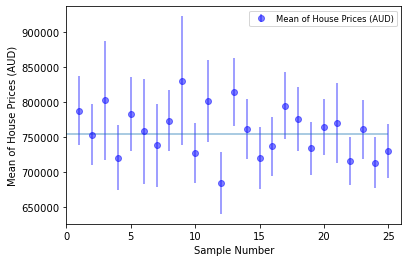

In [148]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices (AUD)")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of House Prices (AUD)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.hlines(threebr_price['price'].mean(), 0, 25, alpha = 0.5 )
plt.show()

In [149]:
# Calculate the range of SEM values
print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")


The range of SEM values in the sample set is 57789.07667599798


In [150]:
# Determine which sample's mean is closest to the population mean
print(f"The smallest SEM observed was {min(sems)}")
samp_index = sems.index(min(sems))
print(f"The sample with the smallest SEM is sample {samp_index+1}")

The smallest SEM observed was 34368.723067386825
The sample with the smallest SEM is sample 22


In [151]:

# Compare to the population mean
print(f"The mean of the sample 5 is {samples[samp_index].price.mean()}")
print(f"The mean of the population data set is {threebr_price.price.mean()}")

The mean of the sample 5 is 715434.9
The mean of the population data set is 753507.4226827422


In [152]:
property_df = data[['price', 'state', 'bedrooms']].copy()
property_df

,price,state,bedrooms
2,1730000.0,NSW,2
3,1928000.0,NSW,3
4,1475000.0,NSW,3
5,960000.0,NSW,2
7,1615000.0,NSW,2
...,...,...,...
320328,439900.0,ACT,2
320330,549900.0,ACT,3
320331,499900.0,ACT,3
320332,434000.0,ACT,3


In [153]:
bedroom = property_df.set_index('state')
bedroom

,price,bedrooms
state,,
NSW,1730000.0,2
NSW,1928000.0,3
NSW,1475000.0,3
NSW,960000.0,2
NSW,1615000.0,2
...,...,...
ACT,439900.0,2
ACT,549900.0,3
ACT,499900.0,3


In [154]:
#Average price with respect to bedroom size in each state 

bedrooms_df = property_df.groupby(['state','bedrooms'],as_index=False).mean().round()
bedrooms_df

,state,bedrooms,price
0,ACT,0,964250.0
1,ACT,1,341233.0
2,ACT,2,448036.0
3,ACT,3,628779.0
4,ACT,4,835605.0
5,ACT,5,1060684.0
6,NSW,0,571222.0
7,NSW,1,661346.0
8,NSW,2,846133.0
9,NSW,3,1113874.0


In [155]:
# Vic data frame with colum state, bedroom , average price
vic_df = bedrooms_df.query('state=="VIC"')
avg_vic_df = vic_df.rename(columns={'price': 'Avg Price'})
avg_vic_df

,state,bedrooms,Avg Price
24,VIC,0,373670.0
25,VIC,1,382225.0
26,VIC,2,624742.0
27,VIC,3,778602.0
28,VIC,4,946544.0
29,VIC,5,1352024.0


bedrooms
0    5.283348e+05
1    3.796082e+05
2    5.282123e+05
3    6.860212e+05
4    8.598562e+05
5    1.160428e+06
Name: Price, dtype: float64


<BarContainer object of 6 artists>

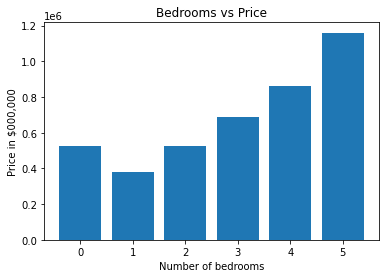

In [156]:

# plotting Bar graph for bedrooms vs Avg price all state 
agg_perbr = bedrooms_df.groupby(['bedrooms']).agg({'price': 'mean'})
#agg_perbr
summary = agg_perbr.reset_index()
#summary
summary_perbr = summary.set_index('bedrooms')
#summary_perbr
summary_perbr.columns = ['Price']
summary_perbr.style.format("${:.9}")
#summary_perbr
x_axis = bedrooms_df['bedrooms'].unique()
x_axis.sort()
price = summary_perbr["Price"]
print(price)
plt.title('Bedrooms vs Price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price in $000,000')
plt.bar(x_axis, price)

In [157]:
#Calculating and appending avg price increase column
avg_vic_df['Avg_price_incr'] = ""
#vic_df

for ind in avg_vic_df.index:
    if avg_vic_df['bedrooms'][ind] == 0 :
        avg_vic_df['Avg_price_incr'][ind] = 0
    else:
        avg_vic_df['Avg_price_incr'][ind] = avg_vic_df['Avg Price'][ind] - avg_vic_df['Avg Price'][ind - 1]

avg_vic_df


<ipython-input-157-fda025920004>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-fda025920004>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,bedrooms,Avg Price,Avg_price_incr
24,VIC,0,373670.0,0
25,VIC,1,382225.0,8555
26,VIC,2,624742.0,242517
27,VIC,3,778602.0,153860
28,VIC,4,946544.0,167942
29,VIC,5,1352024.0,405480


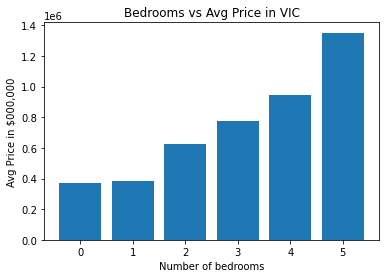

In [158]:
# plotting Bar graph for bedrooms vs Avg price vic
x_axis = avg_vic_df['bedrooms'].unique()
x_axis.sort()
price = avg_vic_df["Avg Price"]

plt.title('Bedrooms vs Avg Price in VIC')
plt.xlabel('Number of bedrooms')
plt.ylabel('Avg Price in $000,000')
vic=plt.bar(x_axis, price)
plt.savefig("vic")

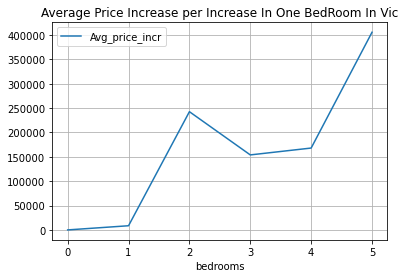

In [159]:
# plotting line graph for bedrooms vs Avg price_increase in vic
lines = avg_vic_df.plot.line(x='bedrooms', y='Avg_price_incr',title = "Average Price Increase per Increase In One BedRoom In Vic", grid = 'true')
plt.savefig("lines")


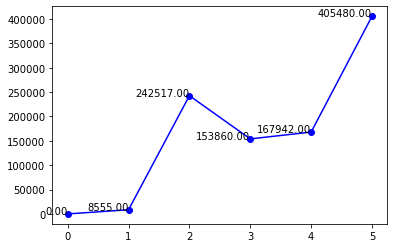

In [160]:
# plotting line graph for bedrooms vs Avg price_increase in vic with values 
plt.clf()

# using some dummy data for this example
xs = avg_vic_df['bedrooms']
ys = avg_vic_df['Avg_price_incr']

# 'bo-' means blue color, round points, solid lines
plt.plot(xs,ys,'bo-')


for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plot = plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='right',
                horizontalalignment='right', verticalalignment='top') # horizontal alignment can be left, right or center


plt.savefig("plot")